<a href="https://colab.research.google.com/github/DeepeshMadane/Machine-learning-/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [133]:
df = pd.read_csv('insurance.csv')

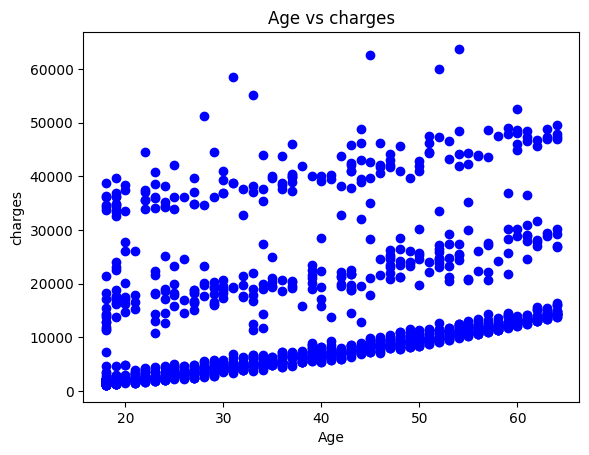

In [134]:
plt.scatter(df['age'],df['charges'],color='blue')
plt.title('Age vs charges')
plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

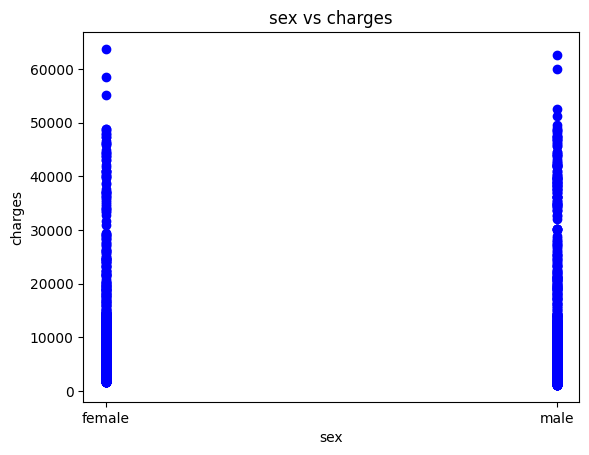

In [135]:
plt.scatter(df['sex'],df['charges'],color='blue')
plt.title('sex vs charges')
plt.xlabel('sex')
plt.ylabel('charges')
plt.show()

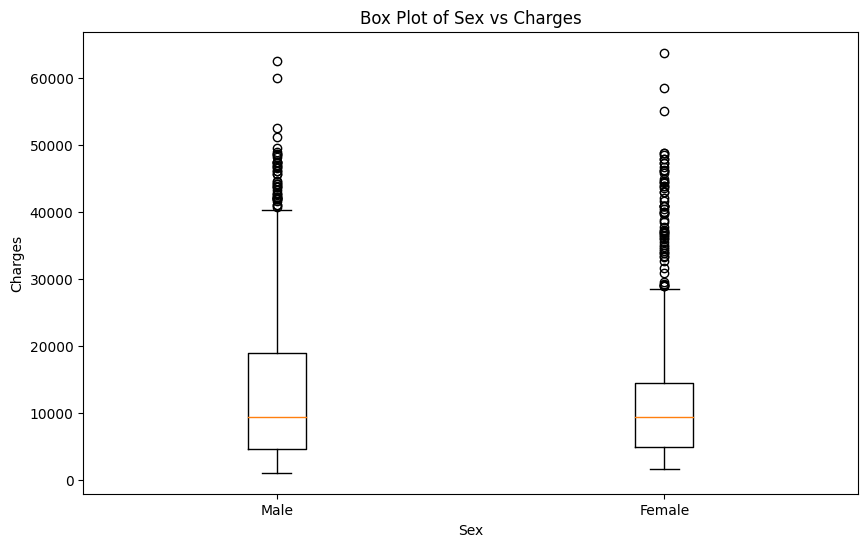

In [136]:
plt.figure(figsize=(10, 6))
male_charges = df[df['sex'] == 'male']['charges']
female_charges = df[df['sex'] == 'female']['charges']
plt.boxplot([male_charges, female_charges], labels=['Male', 'Female'])
plt.title('Box Plot of Sex vs Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

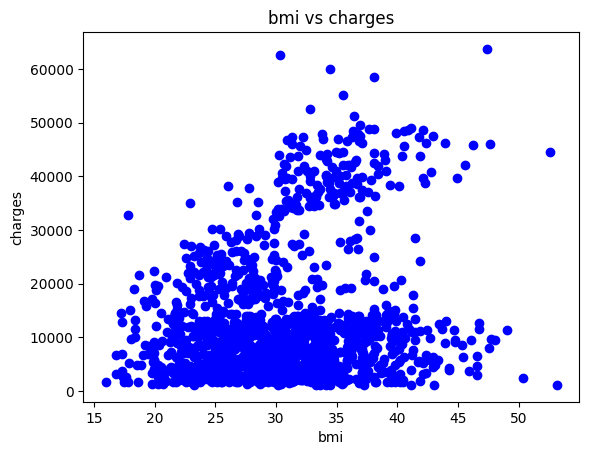

In [137]:
plt.scatter(df['bmi'],df['charges'],color='blue')
plt.title('bmi vs charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

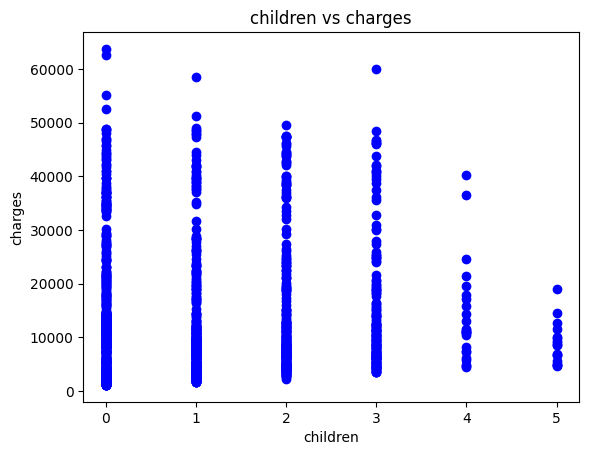

In [138]:
plt.scatter(df['children'],df['charges'],color='blue')
plt.title('children vs charges')
plt.xlabel('children')
plt.ylabel('charges')
plt.show()

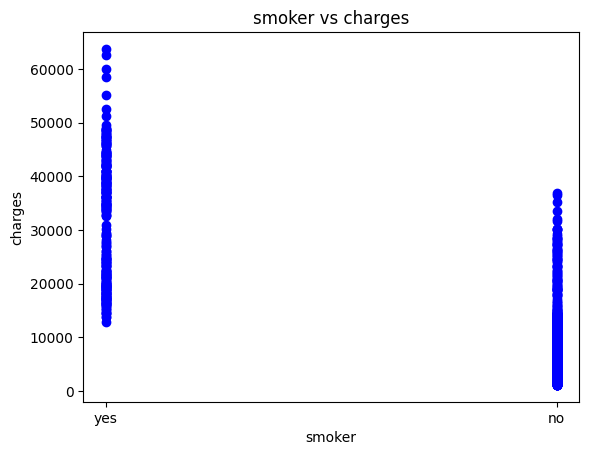

In [139]:
plt.scatter(df['smoker'],df['charges'],color='blue')
plt.title('smoker vs charges')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.show()

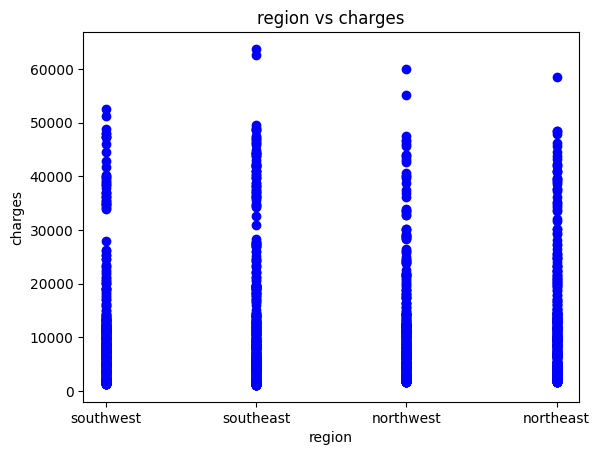

In [140]:
plt.scatter(df['region'],df['charges'],color='blue')
plt.title('region vs charges')
plt.xlabel('region')
plt.ylabel('charges')
plt.show()

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [142]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')

In [145]:
# prompt: change sex column

df['sex'] = le.fit_transform(df['sex'])
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [146]:
region_dummies = pd.get_dummies(df['region']).astype(int)


In [147]:
df = pd.concat([df,region_dummies],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0


In [148]:
# prompt: drop region

df.drop('region',axis=1,inplace=True)
df.head()


,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [149]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [150]:
missing_values = df.isnull().sum()

In [151]:
missing_values

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64

In [152]:
# prompt:  X all columns except charges and in y only charges

X = df.drop('charges', axis=1)
y = df['charges']


In [153]:
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [159]:
# prompt: apply random forest

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [160]:
y_pred = rf_model.predict(X_test)

In [161]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8583587216293013